In [1]:
# Importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.insert(0,'../scripts/')
warnings.filterwarnings('ignore')

In [2]:
from plots import Plots
from data_info import DataInfo
from log_helper import Logger_Class
from data_clean import DataClean

In [3]:
train_data = pd.read_csv('../data/train_store_data.csv')
test_data = pd.read_csv('../data/test_store_data.csv')

In [4]:
train_data.head()

,Store,DayOfWeek,Date,Year,Month,Day,Sales,Customers,Open,Promo,...,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,2015,7,31,5263.0,555,1,1,...,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,2015,7,30,5020.0,546,1,1,...,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,2015,7,29,4782.0,523,1,1,...,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,2015,7,28,5011.0,560,1,1,...,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,2015,7,27,6102.0,612,1,1,...,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [5]:
train_info = DataInfo(train_data)
train_info.get_column_based_missing_percentage()

,total_missing_values,missing_percentage
Store,0,0.0 %
DayOfWeek,0,0.0 %
Date,0,0.0 %
Year,0,0.0 %
Month,0,0.0 %
Day,0,0.0 %
Sales,0,0.0 %
Customers,0,0.0 %
Open,0,0.0 %
Promo,0,0.0 %


In [6]:
test_info = DataInfo(test_data)
test_info.get_column_based_missing_percentage()

,total_missing_values,missing_percentage
Id,0,0.0 %
Store,0,0.0 %
DayOfWeek,0,0.0 %
Date,0,0.0 %
Year,0,0.0 %
Month,0,0.0 %
Day,0,0.0 %
Open,0,0.0 %
Promo,0,0.0 %
StateHoliday,0,0.0 %


### Checking for distribution in both train and test data sets. 
* Are the promotion distributed similarly between these two groups?

### Distribution of Promo

<Figure size 900x700 with 0 Axes>

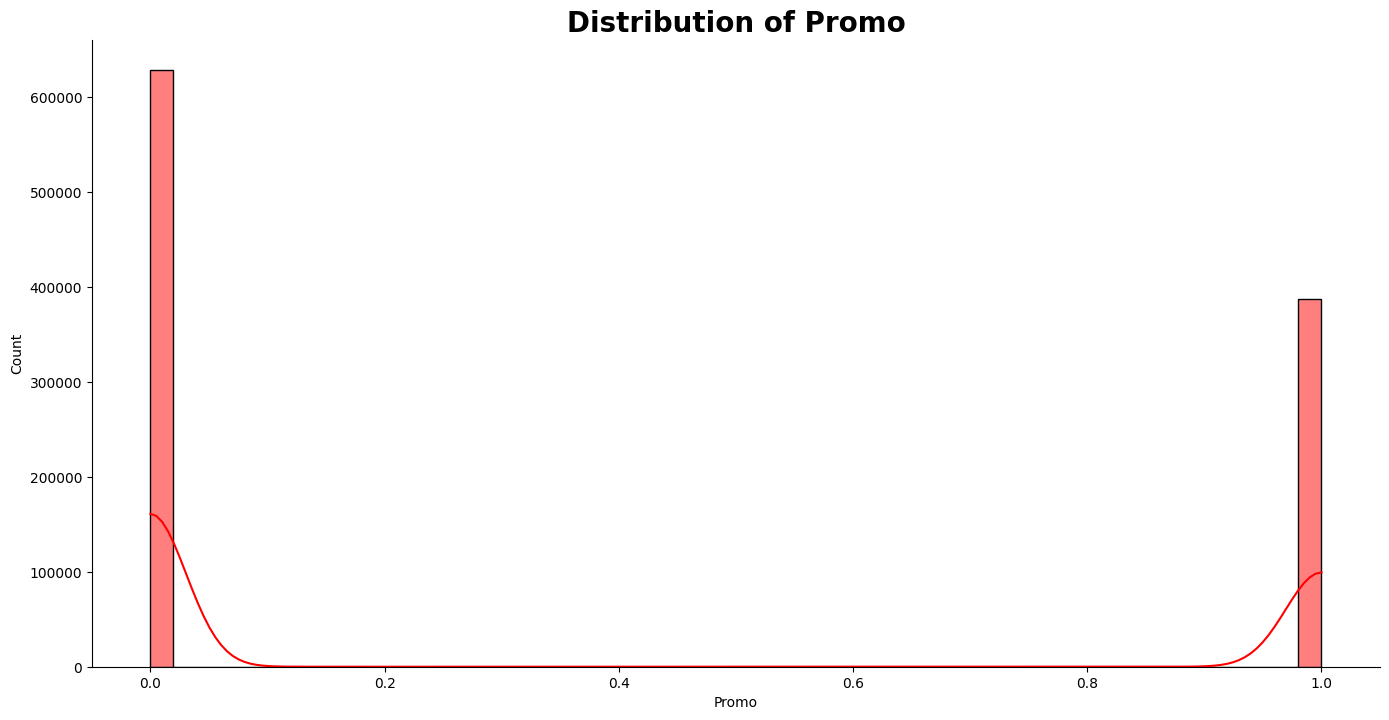

In [7]:
# Distribution of promo in train data
PLT  = Plots()
PLT.plot_hist(train_data,'Promo','red')

<Figure size 900x700 with 0 Axes>

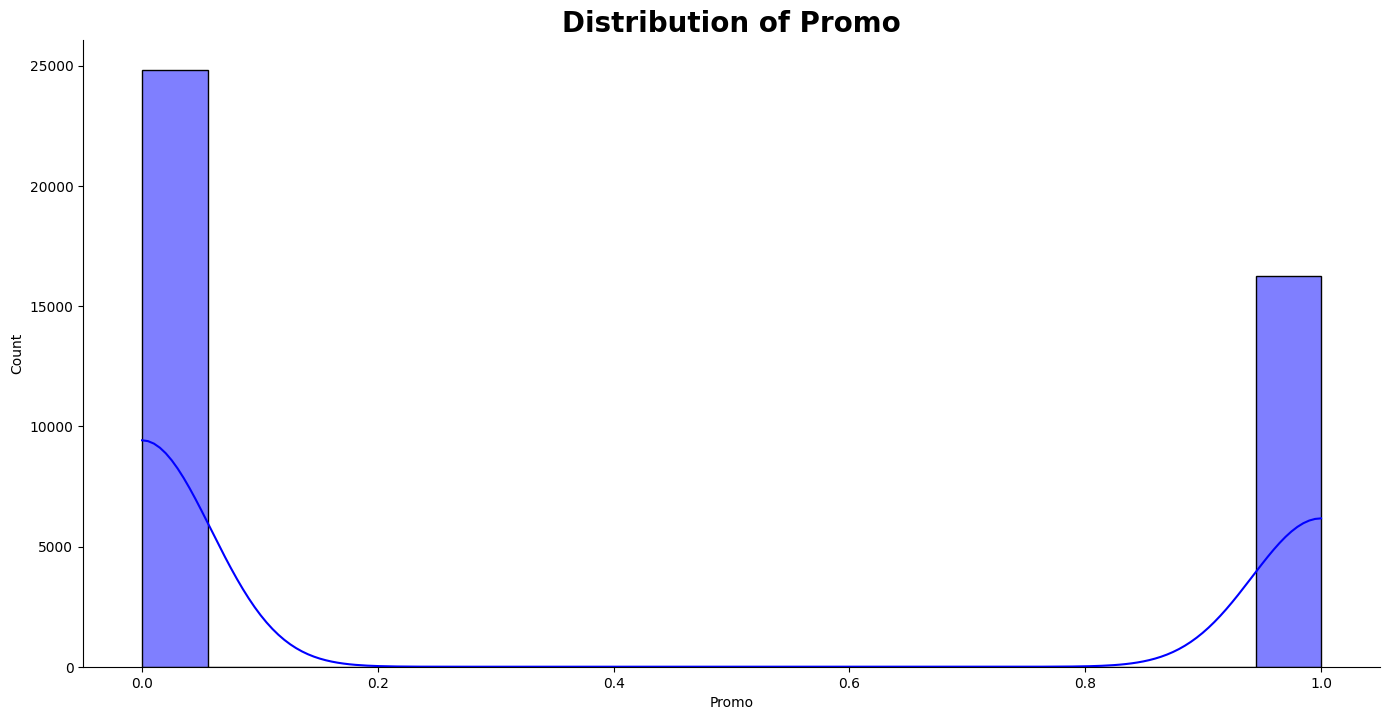

In [8]:
# Distribution of promo in test data
PLT.plot_hist(test_data,'Promo','blue')

In [9]:
# Finding out the total promotion percentage in both the training and test dataset
promo_test_percentage = test_data['Promo'].value_counts(0)[1]/(test_data['Promo'].value_counts(0)[1]+test_data['Promo'].value_counts(0)[0])
promo_train_percentage = train_data['Promo'].value_counts(0)[1]/(train_data['Promo'].value_counts(0)[1]+train_data['Promo'].value_counts(0)[0])

# Printing the number of percentages
print(f'Test Data Promotion Percentage: { promo_test_percentage:.2%}')
print(f'Train Data Promotion Percentage:  {promo_train_percentage:.2%}')


Test Data Promotion Percentage: 39.58%
Train Data Promotion Percentage:  38.15%


*From the above observations, We can say the promotion is distributed similarly! 